In [1]:
import numpy as np
import scipy as sp
import scipy.stats as spstats
import scipy.special as spspecial
from scipy.stats import binned_statistic
from scipy.integrate import quad
from scipy.stats import norm
from argparse import Namespace

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
import matplotlib.cm as cm
#import matplotlib.colors as mc
import seaborn as sns
import colorsys

# load LaTeX and change font to Helvetica for plotting, math mode font also changed to a sans serif font as close to Helvetica as possible (Nature wants sans serif fonts in plots)
plt.rcParams.update({"text.usetex": True})
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{sansmathfonts} \usepackage{helvet}\renewcommand{\familydefault}{\sfdefault} \usepackage{upgreek}'# \usepackage[T1]{fontenc}'#\usepackage{tgheros} \usepackage{sansmathfonts}'#\usepackage{sfmath} \usepackage{sansmathaccent}'# \usepackage{siunitx} \sisetup{detect-all}'# \usepackage{sansmathfonts}'
plt.style.use({'figure.facecolor': 'white'})

fs = 16
SBcolors = sns.color_palette("hls", 8)
# red, gold, apple green, acid green, turquoise, blue, violett, purpure
# https://seaborn.pydata.org/tutorial/color_palettes.html

# --- Utility to lighten color ---
def lighten_color(color, factor = 0.5):
    """Lightens the given color by multiplying (1-luminosity) by the given factor."""
    c = np.array(to_rgb(color))
    return c + (1 - c) * factor


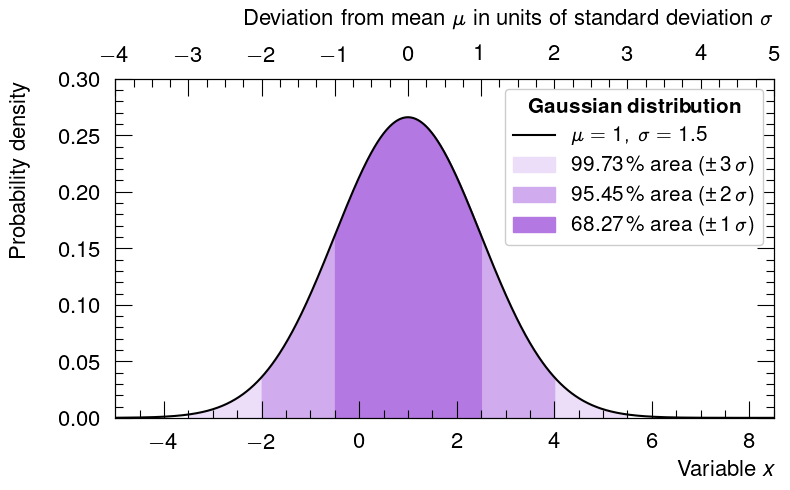

In [3]:
# --- Parameters of the Gaussian ---
mu = 1 # Mean
sigma = 1.5 # Standard deviation

# Colors
base_color = SBcolors[6]

# --- x range and PDF ---
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

# --- Plot Gaussian ---
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, y, label = fr"$\mu =$ " + (r"$-$" + f"{-mu}" if mu < 0 else f"{mu}") + fr"$,\ \sigma =$ " + f"{sigma}", color='k')


# Area percentages for ±1σ, ±2σ, ±3σ
#area_1s = 68.27
#area_2s = 95.45
#area_3s = 99.73

# Calculate area under the curve
area_1s, _ = quad(norm.pdf, mu - sigma, mu + sigma, args=(mu, sigma))
area_2s, _ = quad(norm.pdf, mu - 2 * sigma, mu + 2 * sigma, args=(mu, sigma))
area_3s, _ = quad(norm.pdf, mu - 3 * sigma, mu + 3 * sigma, args=(mu, sigma))

# Convert to percentage
area_1s *= 100
area_2s *= 100
area_3s *= 100


# Fill ±3σ (farthest first, so it stays in the background)
mask3 = (x >= mu - 3 * sigma) & (x <= mu + 3 * sigma)
ax.fill_between(x[mask3], y[mask3], 
                color=lighten_color(base_color, 0.8), alpha = 1,
                label=fr"{area_3s:.2f}\,\% area (±\,3\,$\sigma$)", zorder=-3)

# Fill ±2σ
mask2 = (x >= mu - 2 * sigma) & (x <= mu + 2*sigma)
ax.fill_between(x[mask2], y[mask2], 
                color=lighten_color(base_color, 0.5), alpha = 1,
                label=fr"{area_2s:.2f}\,\% area (±\,2\,$\sigma$)", zorder=-2)

# Fill ±1σ
mask1 = (x >= mu - 1*sigma) & (x <= mu + 1 * sigma)
ax.fill_between(x[mask1], y[mask1], 
                color=lighten_color(base_color, 0.2), alpha = 1,
                label=fr"{area_1s:.2f}\,\% area (±\,1\,$\sigma$)", zorder=-1)


# --- Set x limits and labels ---
ax.set_xlim(mu - 4 * sigma, mu + 5 * sigma)
rounded_ymax = np.ceil(np.max(y) * 10) / 10  # for 2 decimal places, e.g., 0.263 → 0.27
# Set y-axis limits
ax.set_ylim(bottom = 0, top = rounded_ymax)

ax.set_xlabel(r"Variable \textit{x}", fontsize = fs, labelpad = 20, position = (1., 0.), va = 'bottom', ha = 'right')
ax.set_ylabel("Probability density", fontsize = fs, labelpad = 20, position = (0., 1.), va = 'bottom', ha = 'right')

ax.minorticks_on()
ax.tick_params(axis = 'x', pad = 10)
ax.tick_params(axis = 'y', pad = 10)
ax.tick_params('both', direction = 'in', length = 12., width = 0.8, which = 'major', labelsize = fs)
ax.tick_params('both', direction = 'in', length = 6., width = 0.8, which = 'minor', labelsize = fs)
ax.xaxis.get_major_formatter()._usetex = False # Because helvet with sansmathfonts does not work here
ax.yaxis.get_major_formatter()._usetex = False
ax.yaxis.set_ticks_position('both')



# --- Create top x-axis in σ units ---
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())

x_min, x_max = ax.get_xlim()
sigma_min = int(np.floor((x_min - mu) / sigma))
sigma_max = int(np.ceil((x_max - mu) / sigma))
sigma_ticks = np.arange(sigma_min, sigma_max + 1)
tick_positions = mu + sigma_ticks * sigma
tick_labels = [fr"$-$" + f"{-n}" if n < 0 else (r"0" if n == 0 else f"{n}") for n in sigma_ticks]

ax_top.set_xticks(tick_positions)
ax_top.set_xticklabels(tick_labels)
ax_top.set_xlabel(r"Deviation from mean $\mu$ in units of standard deviation $\sigma$", fontsize = fs, labelpad = 10, position = (1., 0.), va = 'bottom', ha = 'right')

ax_top.minorticks_on()
ax_top.tick_params(axis = 'x', pad = 10)
ax_top.tick_params('both', direction = 'in', length = 12., width = 0.8, which = 'major', labelsize = fs)
ax_top.tick_params('both', direction = 'in', length = 6., width = 0.8, which = 'minor', labelsize = fs)
ax_top.xaxis.get_major_formatter()._usetex = False # Because helvet with sansmathfonts does not work here
ax_top.yaxis.get_major_formatter()._usetex = False
ax_top.yaxis.set_ticks_position('both')


handles, labels = ax.get_legend_handles_labels()
ax_top.legend(handles, labels, loc = "upper right", fontsize = fs-1, framealpha = 1, ncol = 1, 
           title_fontsize = fs-1, title = r'\textbf{Gaussian distribution}').set_zorder(102)


# --- Final layout ---
plt.tight_layout()
plt.show()


fig.savefig('GaussianAreas_linear.pdf')
fig.savefig('GaussianAreas_linear.png', dpi = 300)



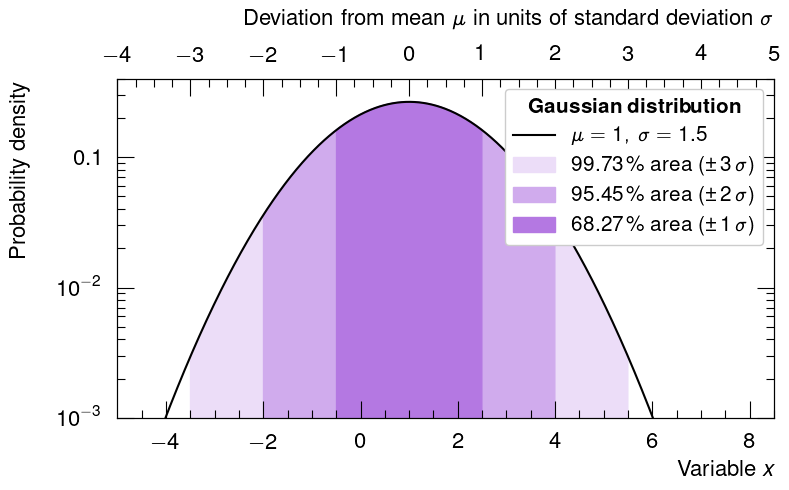

In [4]:
# --- Parameters of the Gaussian ---
mu = 1 # Mean
sigma = 1.5 # Standard deviation

# Colors
base_color = SBcolors[6]

# --- x range and PDF ---
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

# --- Plot Gaussian ---
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, y, label = fr"$\mu =$ " + (r"$-$" + f"{-mu}" if mu < 0 else f"{mu}") + fr"$,\ \sigma =$ " + f"{sigma}", color='k')


# Area percentages for ±1σ, ±2σ, ±3σ
#area_1s = 68.27
#area_2s = 95.45
#area_3s = 99.73

# Calculate area under the curve
area_1s, _ = quad(norm.pdf, mu - sigma, mu + sigma, args=(mu, sigma))
area_2s, _ = quad(norm.pdf, mu - 2 * sigma, mu + 2 * sigma, args=(mu, sigma))
area_3s, _ = quad(norm.pdf, mu - 3 * sigma, mu + 3 * sigma, args=(mu, sigma))

# Convert to percentage
area_1s *= 100
area_2s *= 100
area_3s *= 100


# Fill ±3σ (farthest first, so it stays in the background)
mask3 = (x >= mu - 3 * sigma) & (x <= mu + 3 * sigma)
ax.fill_between(x[mask3], y[mask3], 
                color=lighten_color(base_color, 0.8), alpha = 1,
                label=fr"{area_3s:.2f}\,\% area (±\,3\,$\sigma$)", zorder=-3)

# Fill ±2σ
mask2 = (x >= mu - 2 * sigma) & (x <= mu + 2*sigma)
ax.fill_between(x[mask2], y[mask2], 
                color=lighten_color(base_color, 0.5), alpha = 1,
                label=fr"{area_2s:.2f}\,\% area (±\,2\,$\sigma$)", zorder=-2)

# Fill ±1σ
mask1 = (x >= mu - 1*sigma) & (x <= mu + 1 * sigma)
ax.fill_between(x[mask1], y[mask1], 
                color=lighten_color(base_color, 0.2), alpha = 1,
                label=fr"{area_1s:.2f}\,\% area (±\,1\,$\sigma$)", zorder=-1)


# --- Set x limits and labels ---
ax.set_xlim(mu - 4 * sigma, mu + 5 * sigma)
rounded_ymax = np.ceil(np.max(y) * 10) / 10  # for 2 decimal places, e.g., 0.263 → 0.27
# Set y-axis limits
ax.set_ylim(bottom = 0.001, top = 0.4)#rounded_ymax)

ax.set_xlabel(r"Variable \textit{x}", fontsize = fs, labelpad = 20, position = (1., 0.), va = 'bottom', ha = 'right')
ax.set_ylabel("Probability density", fontsize = fs, labelpad = 20, position = (0., 1.), va = 'bottom', ha = 'right')
per left")

ax.minorticks_on()
ax.tick_params(axis = 'x', pad = 10)
ax.tick_params(axis = 'y', pad = 10)
ax.tick_params('both', direction = 'in', length = 12., width = 0.8, which = 'major', labelsize = fs)
ax.tick_params('both', direction = 'in', length = 6., width = 0.8, which = 'minor', labelsize = fs)
ax.xaxis.get_major_formatter()._usetex = False # Because helvet with sansmathfonts does not work here
ax.yaxis.get_major_formatter()._usetex = False
ax.yaxis.set_ticks_position('both')

ax.set_yscale('log') # symlog delets regular minorticks
#ax.set_ylabel('logy')

# Adjust yticklabels to look nicely
# Be careful with assignments
positions = [0.001, 0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
labels = [r'$\text{10}^{-\text{3}}$', r'$\text{10}^{-\text{2}}$', r'$\text{0.1}$', '1', '10', r'$\text{10}^\text{2}$', r'$\text{10}^\text{3}$', r'$\text{10}^\text{4}$', 
            r'$\text{10}^\text{5}$', r'$\text{10}^\text{6}$', r'$\text{10}^\text{7}$', r'$\text{10}^\text{8}$']

ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(positions))
ax.yaxis.set_major_formatter(mpl.ticker.FixedFormatter(labels))
#ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xtick_spacing))

# --- Create top x-axis in σ units ---
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())

x_min, x_max = ax.get_xlim()
sigma_min = int(np.floor((x_min - mu) / sigma))
sigma_max = int(np.ceil((x_max - mu) / sigma))
sigma_ticks = np.arange(sigma_min, sigma_max + 1)
tick_positions = mu + sigma_ticks * sigma
tick_labels = [fr"$-$" + f"{-n}" if n < 0 else (r"0" if n == 0 else f"{n}") for n in sigma_ticks]

ax_top.set_xticks(tick_positions)
ax_top.set_xticklabels(tick_labels)
ax_top.set_xlabel(r"Deviation from mean $\mu$ in units of standard deviation $\sigma$", fontsize = fs, labelpad = 10, position = (1., 0.), va = 'bottom', ha = 'right')

ax_top.minorticks_on()
ax_top.tick_params(axis = 'x', pad = 10)
ax_top.tick_params('both', direction = 'in', length = 12., width = 0.8, which = 'major', labelsize = fs)
ax_top.tick_params('both', direction = 'in', length = 6., width = 0.8, which = 'minor', labelsize = fs)
ax_top.xaxis.get_major_formatter()._usetex = False # Because helvet with sansmathfonts does not work here
ax_top.yaxis.get_major_formatter()._usetex = False
ax_top.yaxis.set_ticks_position('both')


handles, labels = ax.get_legend_handles_labels()
ax_top.legend(handles, labels, loc = "upper right", fontsize = fs-1, framealpha = 1, ncol = 1, 
           title_fontsize = fs-1, title = r'\textbf{Gaussian distribution}').set_zorder(102)


# --- Final layout ---
plt.tight_layout()
plt.show()


fig.savefig('GaussianAreas_Log.pdf')
fig.savefig('GaussianAreas_Log.png', dpi = 300)

